Подключение библиотек:

In [17]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset 
#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

1-2:
Создание списка путей к картинкам, разделение на выборки:

In [18]:
images_list = []
images_list = glob.glob(os.path.join('C:/Users/user/Desktop/dataset1','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

Проверка:

In [19]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

292
['C:/Users/user/Desktop/dataset1\\bay horse_0000.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0001.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0002.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0003.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0004.jpg']
233
['C:/Users/user/Desktop/dataset1\\bay horse_0000.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0001.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0002.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0003.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0004.jpg']
29
['C:/Users/user/Desktop/dataset1\\zebra_0019.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0020.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0021.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0022.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0023.jpg']
30
['C:/Users/user/Desktop/dataset1\\zebra_0057.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0058.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0059.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_006

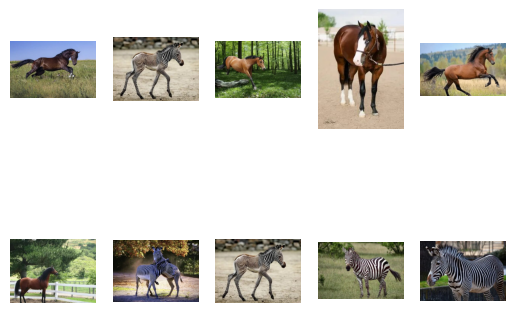

In [20]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')


plt.show()

Класс Dataset
(метки 0 - zebra, 1 - bay horse)

In [21]:
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'zebra':
            label=0
        elif label == 'bay horse':
            label=1
        #print(label)  
            
        return img_transformed,label

4:  Пайплайн предобработки данных 

In [22]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = Dataset(train_list, transform=train_transforms)
test_data = Dataset(test_list, transform=test_transforms)
val_data = Dataset(val_list, transform=val_transforms)

Проверка:

In [23]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0.7137, 0.7137, 0.7059,  ..., 0.6784, 0.6902, 0.6902],
         [0.7059, 0.7059, 0.6980,  ..., 0.6627, 0.6706, 0.6706],
         [0.6863, 0.6863, 0.6784,  ..., 0.6157, 0.6235, 0.6235],
         ...,
         [0.6549, 0.6549, 0.6588,  ..., 0.6706, 0.6510, 0.6471],
         [0.6471, 0.6471, 0.6471,  ..., 0.6902, 0.6667, 0.6627],
         [0.6431, 0.6431, 0.6431,  ..., 0.6980, 0.6745, 0.6706]],

        [[0.5216, 0.5216, 0.5137,  ..., 0.4980, 0.5059, 0.5059],
         [0.5176, 0.5176, 0.5098,  ..., 0.4863, 0.4941, 0.4941],
         [0.5059, 0.5059, 0.4980,  ..., 0.4510, 0.4588, 0.4588],
         ...,
         [0.5686, 0.5686, 0.5725,  ..., 0.5569, 0.5412, 0.5373],
         [0.5647, 0.5647, 0.5686,  ..., 0.5725, 0.5529, 0.5490],
         [0.5608, 0.5608, 0.5647,  ..., 0.5804, 0.5569, 0.5529]],

        [[0.3922, 0.3922, 0.3882,  ..., 0.3647, 0.3725, 0.3725],
         [0.3882, 0.3882, 0.3843,  ..., 0.3490, 0.3569, 0.3569],
         [0.3765, 0.3765, 0.3725,  ..., 0.3098, 0.3176, 0

3:  Сверточная нейронная сеть

In [24]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

Загрузка наборов данных:

In [25]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True )

test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=batch_size, 
                                         shuffle=False)

Проверка:

In [26]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

233 3
30 1


torch.Size([3, 224, 224])